In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [33]:
# To build models for prediction
from sklearn import linear_model
from sklearn.model_selection import train_test_split,  cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression



from sklearn import tree

#CV
from sklearn.model_selection import GridSearchCV


# To check model performance
from sklearn.metrics import  make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import  Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [5]:
df = pd.read_csv("CensusCanada2021Training.csv")

In [7]:
df

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,3409,1460.0,84000.0,1460.0,15.0,0.0,0.0,0.0,20.0,40.0,465.0,915.0,780,675,5,1460.0,1060.0,400.0
5367,8408,4195.0,62800.0,4195.0,335.0,750.0,515.0,580.0,355.0,505.0,255.0,900.0,1505,2685,5,4195.0,1845.0,2350.0
5368,3609,1460.0,66000.0,1460.0,450.0,670.0,85.0,35.0,30.0,30.0,120.0,45.0,1220,275,0,1460.0,940.0,525.0
5369,3084,1165.0,100000.0,1165.0,70.0,365.0,280.0,180.0,105.0,80.0,50.0,40.0,815,335,15,1165.0,975.0,190.0


In [8]:
df_income = df.drop(columns = ['Total Population', 'Total Households',
       'Total Households For Period Of Construction',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Period Of Construction Built Between 2006 And 2010',
       'Total Households For Period Of Construction Built Between 2011 And 2015',
       'Total Households For Period Of Construction Built Between 2016 And 2021',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Total Households for Tenure', 'Dwellings by Tenure Owner',
       'Dwellings by Tenure Renter'])

In [9]:
df_income

,Median Household Income (Current Year $)
0,107000.0
1,111000.0
2,105000.0
3,65000.0
4,101000.0
...,...
5366,84000.0
5367,62800.0
5368,66000.0
5369,100000.0


In [10]:
scaler = StandardScaler()
df_income_scaled = scaler.fit_transform(df_income)
df_income_scaled = pd.DataFrame(df_income_scaled, columns=df_income.columns)
df_income_scaled.head()

,Median Household Income (Current Year $)
0,1.128994
1,1.299047
2,1.043968
3,-0.656560
4,0.873915


Thought process:


so for these: 4 clusters size 2090, 1890, 806 and 585


try linear regression
decision tree ( regression)
and neural net

split train and validation

In [11]:
# read data
df_cluster = pd.read_csv('P2Clustering.csv')

In [12]:
df_cluster.head()

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter,Cluster
0,-0.649781,-0.676848,-0.676848,0.123638,-0.722858,-0.164971,-0.780634,2
1,0.649287,-0.175556,-0.175556,0.777824,-0.818577,0.321078,-0.582416,0
2,1.670083,1.118476,1.118476,1.849576,-0.399808,1.881137,-0.384199,3
3,-0.192486,-0.047319,-0.047319,0.304583,-0.549368,0.336757,-0.417235,0
4,-0.392843,-0.501979,-0.501979,-0.015550,-0.489544,0.140769,-0.846706,0


In [13]:
df_combined = pd.concat([df_cluster, df_income_scaled], axis=1)

In [14]:
df_combined.isnull().sum()

Total Population                                                               0
Total Households                                                               0
Total Households For Period Of Construction                                    0
Total Households For Structure Type Houses                                     0
Total Households For Structure Type Apartment, Building Low And High Rise      0
Dwellings by Tenure Owner                                                      0
Dwellings by Tenure Renter                                                     0
Cluster                                                                        0
Median Household Income (Current Year $)                                     126
dtype: int64

In [15]:
df_combined['Cluster'].value_counts()

0    2090
2    1890
1     806
3     585
Name: Cluster, dtype: int64

# Model

In [16]:
#Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mse = mean_squared_error(target, pred)          # To compute MSE
    mae = mean_absolute_error(target, pred)           # To compute MAE


    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MSE": mse,
            "MAE": mae,
            "R-squared": r2,

        },
        index=[0],
    )

    return df_perf

In [32]:
def split_dataframes(X, y, test_size, random_state):

    train_df = []
    val_df = []

          # Split each dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=test_size, random_state=random_state)


    return X_train, X_test, y_train, y_test




In [18]:
def DecisionTree_Regressor(X_train, y_train, X_test, y_test, max_depth, min_samples_leaf, min_samples_split):

  # Decision Tree Regressor
  dt_regressor = DecisionTreeRegressor(random_state = 1, max_depth= max_depth)

  # Fitting the model
  dt_regressor.fit(X_train, y_train)

  # Model Performance on the test data, i.e., prediction
  dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)

  dt_regressor_perf_test
  return dt_regressor_perf_test, dt_regressor

In [19]:
def DecisionTree_Regressor_GS(X_train, y_train, model):
# Define the hyperparameter grid
  param_grid = {
    'max_depth': [4,5, 6,7, 8,9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

  # Initialize the grid search
  grid_search = GridSearchCV(model, param_grid, cv=5)

  # Perform the grid search on the training data
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_

  return best_params

In [20]:
def RandomForest_Regressor(X_train, y_train, X_test, y_test, n_estimators, max_depth, min_samples_split):
    # Random Forest Regressor with specified hyperparameters
    rf_regressor = RandomForestRegressor(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=1
    )

    y_train_flat = y_train.values[:, 0]
    y_test_flat = y_test.values[:, 0]

    # Fitting the model
    rf_regressor.fit(X_train, y_train_flat)

    # Model Performance on the test data
    rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test_flat)

    return rf_regressor_perf_test, rf_regressor

In [21]:
def RandomForest_Regressor_withGridsearch(X_train, y_train,  X_test, y_test):
  # Random Forest Regressor
  rf_regressor = RandomForestRegressor(random_state=1)

      # Define the parameter grid to search
  param_grid = {
          'n_estimators': [50, 100, 150],  # Adjust values based on your requirements
          'max_depth': [4,5,6,7,8,9,10,12],      # Adjust values based on your requirements
          'min_samples_split': [2, 5, 10],  # Adjust values based on your requirements

      }

      # Define the scoring metric
  scoring = make_scorer(mean_squared_error, greater_is_better=False)

      # Create the GridSearchCV object
  grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)

      # Fit the GridSearchCV to the data
  grid_search.fit(X_train, y_train.values[:, 0])

      # Get the best model from the grid search
  best_rf_regressor = grid_search.best_estimator_

      # Model Performance on the test data
  rf_regressor_perf_test = model_performance_regression(best_rf_regressor, X_test, y_test.values[:, 0])

  return rf_regressor_perf_test, best_rf_regressor

In [22]:


def XGBoost_Regressor(X_train, y_train, X_test, y_test, max_depth, learning_rate=0.1, n_estimators=100):
    # Initialize the XGBoost regressor
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = learning_rate,
                             max_depth = max_depth, alpha = 10, n_estimators = n_estimators, random_state=42)

    # Fit the model to the training set
    xg_reg.fit(X_train, y_train)

    # Predictions on the training set
    y_train_pred = xg_reg.predict(X_train)

    # Predictions on the test set
    y_test_pred = xg_reg.predict(X_test)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Print the mean squared error on the test set
    print("Mean Squared Error on Training Set:", mse_train)
    print("Mean Squared Error on Test Set:", mse_test)

    # Return the model and performance metrics
    return xg_reg, {'mse_train': mse_train, 'mse_test': mse_test}


In [23]:
def LinearRegression_1(X_train, y_train, X_test, y_test):

  lin_reg2 = LinearRegression()
  lin_reg2.fit(X_train, y_train)

  from sklearn.metrics import mean_absolute_error, mean_squared_error

  y_train_pred = lin_reg2.predict(X_train)
  y_val_pred = lin_reg2.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)

  val_mse = mean_squared_error(y_test, y_val_pred)
  print(f'Linear Regression -  Train MSE: {train_mse}')
  print(f'Linear Regression -  Validation MSE: {val_mse}')

  return val_mse

## Group One -

In [ ]:
df0 = df_combined[df_combined['Cluster'] == 0]

In [ ]:
df0.shape

(1890, 9)

In [ ]:
df0.describe()

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter,Cluster,Median Household Income (Current Year $)
count,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.0,1764.000000
mean,-0.940871,-0.882845,-0.882845,-0.709180,-0.342943,-0.836451,-0.377994,0.0,-0.137863
std,0.507870,0.483498,0.483498,0.498309,0.552272,0.471254,0.584279,0.0,1.094578
min,-2.081956,-2.104946,-2.104946,-1.456151,-0.878401,-1.819105,-1.077960,0.0,-2.425109
25%,-1.236240,-1.165024,-1.165024,-1.142977,-0.830542,-1.215463,-0.871483,0.0,-0.971158
50%,-0.843876,-0.828401,-0.828401,-0.697574,-0.537403,-0.799970,-0.508085,0.0,-0.273941
75%,-0.574531,-0.560268,-0.560268,-0.274789,0.036909,-0.462872,-0.012542,0.0,0.533809
max,0.518036,0.104235,0.104235,0.262827,1.275271,0.219164,1.531902,0.0,6.783250


In [ ]:
df0.isnull().sum()

Total Population                                                               0
Total Households                                                               0
Total Households For Period Of Construction                                    0
Total Households For Structure Type Houses                                     0
Total Households For Structure Type Apartment, Building Low And High Rise      0
Dwellings by Tenure Owner                                                      0
Dwellings by Tenure Renter                                                     0
Cluster                                                                        0
Median Household Income (Current Year $)                                     126
dtype: int64

In [ ]:
df0.shape

(1890, 9)

In [ ]:
df0 = df0.dropna()

In [ ]:
df0.shape

(1764, 9)

In [ ]:
df0.isnull().sum()

Total Population                                                             0
Total Households                                                             0
Total Households For Period Of Construction                                  0
Total Households For Structure Type Houses                                   0
Total Households For Structure Type Apartment, Building Low And High Rise    0
Dwellings by Tenure Owner                                                    0
Dwellings by Tenure Renter                                                   0
Cluster                                                                      0
Median Household Income (Current Year $)                                     0
dtype: int64

In [ ]:
cols = ['Total Population', 'Total Households',	'Total Households For Period Of Construction', 	'Total Households For Structure Type Houses',	'Total Households For Structure Type Apartment, Building Low And High Rise', 'Dwellings by Tenure Owner',	'Dwellings by Tenure Renter']
y_targ = ['Median Household Income (Current Year $)']

X_train_0, X_test_0, y_train_0, y_test_0 = split_dataframes(X= df0[cols],y = df0[y_targ], test_size=0.3, random_state=42)


In [ ]:
X_train_0

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter
1851,-0.953561,-1.137336,-1.137336,-0.293927,-0.854472,-0.823489,-0.739338
3904,-0.074685,-0.257162,-0.257162,-0.704533,0.389872,-0.807810,0.491261
3956,-1.692838,-1.761036,-1.761036,-1.066424,-0.854472,-1.348735,-1.061442
1365,-1.197513,-1.003270,-1.003270,-1.323922,0.156558,-1.599599,0.260007
1502,-1.150207,-1.090705,-1.090705,-0.335684,-0.788665,-0.627501,-0.888001
...,...,...,...,...,...,...,...
3506,-1.260588,-0.740966,-0.740966,-1.310003,0.383890,-1.262500,0.284784
4028,-1.108930,-0.875033,-0.875033,-1.435273,0.365942,-1.317377,0.152640
2652,-0.654882,-0.665190,-0.665190,-0.154739,-0.531421,-0.517748,-0.392458
4519,-1.269400,-1.341350,-1.341350,-0.690615,-0.752770,-0.917563,-0.945815


In [ ]:
df0[y_targ].isna().sum()

Median Household Income (Current Year $)    0
dtype: int64

In [ ]:
print(y_train_0.isnull().sum())
print(y_test_0.isnull().sum())

Median Household Income (Current Year $)    0
dtype: int64
Median Household Income (Current Year $)    0
dtype: int64


In [ ]:
dt_regressor_perf_test_df0 , dt_regressor_df0 = DecisionTree_Regressor(X_train_0,  y_train_0,X_test_0, y_test_0, max_depth= 10, min_samples_leaf = 5, min_samples_split = 5)
dt_regressor_perf_test_df0

,RMSE,MSE,MAE,R-squared
0,0.842435,0.709697,0.576211,0.440644


In [ ]:
DecisionTree_Regressor_GS(X_train_0,  y_train_0, dt_regressor_df0)

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
# taking grid search result and putting it into decision tree
dt_regressor_perf_test_df0_best , dt_regressor_df0_best = DecisionTree_Regressor(X_train_0,  y_train_0,X_test_0, y_test_0, max_depth= 7, min_samples_leaf = 4, min_samples_split = 10)

print(dt_regressor_perf_test_df0_best)

       RMSE      MSE       MAE  R-squared
0  0.778858  0.60662  0.539418   0.521885


In [ ]:
rf_regressor_perf_test_df0, rf_regressor_df0 =  RandomForest_Regressor(X_train_0, y_train_0,X_test_0, y_test_0, n_estimators=150, max_depth=12, min_samples_split=5)
rf_regressor_perf_test_df0

,RMSE,MSE,MAE,R-squared
0,0.637078,0.405869,0.43272,0.68011


In [ ]:
RandomForest_Regressor_withGridsearch(X_train_0, y_train_0,X_test_0, y_test_0)


(       RMSE       MSE      MAE  R-squared
 0  0.637078  0.405869  0.43272    0.68011,
 RandomForestRegressor(max_depth=12, min_samples_split=5, n_estimators=150,
                       random_state=1))

In [ ]:
rf_regressor_perf_test_df0, rf_regressor_df0 =  RandomForest_Regressor(X_train_0, y_train_0,X_test_0, y_test_0, n_estimators=150, max_depth=12, min_samples_split=5)
rf_regressor_perf_test_df0

,RMSE,MSE,MAE,R-squared
0,0.637078,0.405869,0.43272,0.68011


In [ ]:
XGBoost_Regressor(X_train_0, y_train_0,X_test_0, y_test_0, max_depth=7, learning_rate=0.1, n_estimators=150)


Mean Squared Error on Training Set: 0.3372853680221851
Mean Squared Error on Test Set: 0.47046068504583827


(XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...),
 {'mse_train': 0.3372853680221851, 'mse_test': 0.47046068504583827})

In [ ]:
from keras.metrics import RootMeanSquaredError


In [ ]:



model = Sequential()
model.add(Dense(128, input_shape=(7,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer= 'Adam', metrics=['mean_squared_error'])


monitor = EarlyStopping(monitor='val_mean_squared_error',
                        patience=5, verbose=1, mode='auto',
                        restore_best_weights=True)
model.fit(X_train_0, y_train_0,validation_data=(X_test_0,y_test_0),callbacks=[monitor],verbose=2,epochs=50)




Epoch 1/50
39/39 - 9s - loss: 1.2566 - mean_squared_error: 1.2566 - val_loss: 1.1406 - val_mean_squared_error: 1.1406 - 9s/epoch - 242ms/step
Epoch 2/50
39/39 - 0s - loss: 0.7973 - mean_squared_error: 0.7973 - val_loss: 1.0763 - val_mean_squared_error: 1.0763 - 355ms/epoch - 9ms/step
Epoch 3/50
39/39 - 0s - loss: 0.6932 - mean_squared_error: 0.6932 - val_loss: 1.1113 - val_mean_squared_error: 1.1113 - 328ms/epoch - 8ms/step
Epoch 4/50
39/39 - 0s - loss: 0.6479 - mean_squared_error: 0.6479 - val_loss: 0.9936 - val_mean_squared_error: 0.9936 - 240ms/epoch - 6ms/step
Epoch 5/50
39/39 - 0s - loss: 0.5749 - mean_squared_error: 0.5749 - val_loss: 1.0033 - val_mean_squared_error: 1.0033 - 250ms/epoch - 6ms/step
Epoch 6/50
39/39 - 0s - loss: 0.5398 - mean_squared_error: 0.5398 - val_loss: 0.9483 - val_mean_squared_error: 0.9483 - 257ms/epoch - 7ms/step
Epoch 7/50
39/39 - 0s - loss: 0.5688 - mean_squared_error: 0.5688 - val_loss: 0.8813 - val_mean_squared_error: 0.8813 - 260ms/epoch - 7ms/step


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_0, y_train_0)

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_train_pred = lin_reg2.predict(X_train_0)
y_val_pred = lin_reg2.predict(X_test_0)


train_mse = mean_squared_error(y_train_0, y_train_pred)

val_mse = mean_squared_error(y_test_0, y_val_pred)
print(f'Linear Regression -  Train MSE: {train_mse}')
print(f'Linear Regression -  Validation MSE: {val_mse}')

Linear Regression -  Train MSE: 0.5131186751970607
Linear Regression -  Validation MSE: 0.5208290220987604


In [ ]:
LinearRegression_1(X_train_0, y_train_0,X_test_0, y_test_0)


Linear Regression -  Train MSE: 0.5131186751970607
Linear Regression -  Validation MSE: 0.5208290220987604


0.5208290220987604

## Group Two  


In [ ]:
df1 = df_combined[df_combined['Cluster'] == 1]

In [ ]:
df1.shape

(2090, 9)

In [ ]:
df1

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter,Cluster,Median Household Income (Current Year $)
1,0.649287,-0.175556,-0.175556,0.777824,-0.818577,0.321078,-0.582416,1,1.299047
3,-0.192486,-0.047319,-0.047319,0.304583,-0.549368,0.336757,-0.417235,1,-0.656560
4,-0.392843,-0.501979,-0.501979,-0.015550,-0.489544,0.140769,-0.846706,1,0.873915
6,0.212864,0.016800,0.016800,-1.101221,1.029991,-0.204168,0.251748,1,0.108677
7,0.134947,0.075090,0.075090,0.930932,-0.710894,0.783608,-0.714561,1,0.661349
...,...,...,...,...,...,...,...,...,...
5362,0.050538,-0.012345,-0.012345,0.283705,-0.208370,0.399473,-0.433753,1,0.363757
5363,0.347826,0.150866,0.150866,0.777824,-0.453649,0.673855,-0.475049,1,0.151191
5364,1.120959,0.209156,0.209156,1.313700,-0.872419,0.846324,-0.598935,1,1.341560
5365,-0.518993,-0.531123,-0.531123,0.311543,-0.764735,-0.306082,-0.425494,1,-0.210172


In [ ]:
df1.describe()

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter,Cluster,Median Household Income (Current Year $)
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.0,2090.000000
mean,0.179842,-0.014858,-0.014858,0.422148,-0.351831,0.302593,-0.335384,1.0,0.350403
std,0.418828,0.362951,0.362951,0.468454,0.450758,0.440723,0.487845,0.0,0.874824
min,-0.768974,-0.840059,-0.840059,-1.233450,-0.878401,-1.097871,-1.053183,1.0,-1.549337
25%,-0.148775,-0.292136,-0.292136,0.116679,-0.734823,-0.021900,-0.731079,1.0,-0.295198
50%,0.135179,-0.029832,-0.029832,0.408975,-0.465614,0.274041,-0.450272,1.0,0.236217
75%,0.484527,0.255788,0.255788,0.749987,-0.046845,0.611139,-0.012542,1.0,0.916428
max,1.865337,0.966922,0.966922,1.626874,1.311165,1.630274,1.168503,1.0,4.827643


In [ ]:
df1.isna().sum()

Total Population                                                             0
Total Households                                                             0
Total Households For Period Of Construction                                  0
Total Households For Structure Type Houses                                   0
Total Households For Structure Type Apartment, Building Low And High Rise    0
Dwellings by Tenure Owner                                                    0
Dwellings by Tenure Renter                                                   0
Cluster                                                                      0
Median Household Income (Current Year $)                                     0
dtype: int64

In [ ]:
cols = ['Total Population', 'Total Households',	'Total Households For Period Of Construction', 	'Total Households For Structure Type Houses',	'Total Households For Structure Type Apartment, Building Low And High Rise', 'Dwellings by Tenure Owner',	'Dwellings by Tenure Renter']
y_targ = ['Median Household Income (Current Year $)']

X_train_1, X_test_1, y_train_1, y_test_1 = split_dataframes(X= df1[cols],y = df1[y_targ], test_size=0.3, random_state=42)


In [ ]:
dt_perf_train1, dt_model1 = DecisionTree_Regressor(X_train_1, y_train_1, X_test_1, y_test_1,   6, 10, 10 )
dt_perf_train1

,RMSE,MSE,MAE,R-squared
0,0.629384,0.396124,0.456133,0.473465


In [ ]:
DecisionTree_Regressor_GS(X_train_1, y_train_1, dt_model1)

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [ ]:
dt_regressor_perf_test1_GS, dt_regressor_GS= DecisionTree_Regressor(X_train_1, y_train_1,X_test_1, y_test_1, max_depth=5, min_samples_leaf =4, min_samples_split = 10)
print(dt_regressor_perf_test1_GS)
print(dt_regressor_GS)

       RMSE       MSE       MAE  R-squared
0  0.624736  0.390295  0.465002   0.481213
DecisionTreeRegressor(max_depth=5, random_state=1)


In [ ]:
RandomForest_Regressor(X_train_1, y_train_1,X_test_1, y_test_1, n_estimators=150, max_depth=5, min_samples_split=5)

(       RMSE       MSE       MAE  R-squared
 0  0.579119  0.335379  0.428176   0.554209,
 RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=150,
                       random_state=1))

In [ ]:
XGBoost_Regressor(X_train_1, y_train_1,X_test_1, y_test_1, max_depth = 4)

Mean Squared Error on Training Set: 0.2587770543349662
Mean Squared Error on Test Set: 0.32957009031505186


(XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...),
 {'mse_train': 0.2587770543349662, 'mse_test': 0.32957009031505186})

In [ ]:
X_test_1

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter
2134,0.289852,-0.228017,-0.228017,0.708230,-0.812595,0.571942,-0.921038
3944,0.138194,-0.362083,-0.362083,-0.161698,-0.202388,0.085893,-0.598935
1433,0.388639,0.040116,0.040116,0.088841,0.012980,0.618979,-0.582416
1824,0.300519,-0.338767,-0.338767,0.582960,-0.794647,0.211325,-0.689784
1093,-0.383567,-0.111437,-0.111437,0.040125,-0.088722,-0.337440,0.202194
...,...,...,...,...,...,...,...
1514,0.084858,-0.175556,-0.175556,0.749987,-0.800630,0.422991,-0.698043
2729,0.054712,0.267446,0.267446,1.028364,-0.561333,0.697374,-0.359422
3827,-0.092772,-0.432031,-0.432031,0.527285,-0.866436,0.281880,-0.912779
3860,0.584357,0.238301,0.238301,0.805662,-0.399808,0.462189,-0.136427


In [ ]:
LinearRegression_1(X_train_1, y_train_1, X_test_1, y_test_1)


Linear Regression -  Train MSE: 0.3171026107393715
Linear Regression -  Validation MSE: 0.3304435308109578


0.3304435308109578

## Group Three
  

In [ ]:
df2 = df_combined[df_combined['Cluster'] == 2]
df2

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter,Cluster,Median Household Income (Current Year $)
2,1.670083,1.118476,1.118476,1.849576,-0.399808,1.881137,-0.384199,2,1.043968
11,1.888527,1.433240,1.433240,1.703428,-0.190423,1.826261,0.119603,2,0.831402
33,1.165482,0.786224,0.786224,1.007485,-0.016933,1.238299,-0.194241,2,0.661349
39,1.222528,1.398266,1.398266,1.508564,0.048874,1.355891,0.549074,2,-0.295198
61,2.452028,0.891146,0.891146,1.717347,-0.471597,1.638113,-0.458531,2,0.618836
...,...,...,...,...,...,...,...,...,...
5304,1.933050,2.330902,2.330902,0.527285,1.975214,2.179038,1.011581,2,-0.592790
5313,1.216499,0.803711,0.803711,1.007485,0.001015,1.120706,-0.029060,2,-0.167658
5331,1.554600,0.972751,0.972751,1.411132,-0.148546,1.105027,0.210453,2,0.831402
5347,3.953307,3.415090,3.415090,2.580316,1.329112,2.469100,2.225662,2,0.576323


In [ ]:
df2.shape

(584, 9)

In [ ]:
cols = ['Total Population', 'Total Households',	'Total Households For Period Of Construction', 	'Total Households For Structure Type Houses',	'Total Households For Structure Type Apartment, Building Low And High Rise', 'Dwellings by Tenure Owner',	'Dwellings by Tenure Renter']
y_targ = ['Median Household Income (Current Year $)']

X_train_2, X_test_2, y_train_2, y_test_2 = split_dataframes(X= df2[cols],y = df2[y_targ], test_size=0.3, random_state=42)


In [ ]:
dt_perf_train2, dt_model2 = DecisionTree_Regressor(X_train_2, y_train_2, X_test_2, y_test_2,   7, 10, 10 )
dt_perf_train2

,RMSE,MSE,MAE,R-squared
0,0.628553,0.395078,0.45878,0.252017


In [ ]:
DecisionTree_Regressor_GS(X_train_2, y_train_2, dt_model2)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
dt_regressor_perf_test2_GS, dt2_regressor_GS= DecisionTree_Regressor(X_train_2, y_train_2, X_test_2,y_test_2, max_depth=6, min_samples_leaf =4, min_samples_split = 10)
print(dt_regressor_perf_test2_GS)
print(dt2_regressor_GS)

       RMSE       MSE      MAE  R-squared
0  0.619757  0.384099  0.45431   0.272804
DecisionTreeRegressor(max_depth=6, random_state=1)


In [ ]:
RandomForest_Regressor(X_train_2, y_train_2, X_test_2,y_test_2, n_estimators=150, max_depth=6, min_samples_split=5)

(      RMSE      MSE       MAE  R-squared
 0  0.50015  0.25015  0.370033   0.526404,
 RandomForestRegressor(max_depth=6, min_samples_split=5, n_estimators=150,
                       random_state=1))

In [ ]:
XGBoost_Regressor(X_train_2, y_train_2, X_test_2,y_test_2, max_depth = 5)

Mean Squared Error on Training Set: 0.1730088337007329
Mean Squared Error on Test Set: 0.2997048721858912


(XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...),
 {'mse_train': 0.1730088337007329, 'mse_test': 0.2997048721858912})

In [ ]:
LinearRegression_1(X_train_2, y_train_2, X_test_2,y_test_2)


Linear Regression -  Train MSE: 0.18403323129652652
Linear Regression -  Validation MSE: 0.24668339717484533


0.24668339717484533

# Group Four

In [ ]:
df3 = df_combined[df_combined['Cluster'] == 3]
df3

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter,Cluster,Median Household Income (Current Year $)
12,-0.124310,0.115892,0.115892,-1.052505,1.059903,-0.611822,0.813364,3,-0.937147
21,0.588995,1.305003,1.305003,-0.286968,1.598321,0.101572,1.746637,3,-1.413295
32,0.812077,1.934532,1.934532,-0.975951,2.848648,-0.219847,2.977236,3,-1.005168
42,-0.233300,0.442315,0.442315,-0.634939,1.012044,-0.674538,1.341944,3,-1.668374
47,0.499020,1.922874,1.922874,-1.379598,3.201611,0.015337,2.712947,3,-0.920142
...,...,...,...,...,...,...,...,...,...
5344,1.435407,2.966260,2.966260,-0.579264,3.590468,0.564102,3.613184,3,-1.328269
5346,-0.057061,0.599697,0.599697,-1.386557,1.987179,0.109411,0.730773,3,-0.818110
5350,2.939469,4.213660,4.213660,-1.351760,5.528773,0.399473,5.562321,3,-0.750089
5367,1.817567,2.773904,2.773904,0.638636,2.334159,1.073669,2.803796,3,-0.750089


In [ ]:
df3.shape

(807, 9)

In [ ]:
cols = ['Total Population', 'Total Households',	'Total Households For Period Of Construction', 	'Total Households For Structure Type Houses',	'Total Households For Structure Type Apartment, Building Low And High Rise', 'Dwellings by Tenure Owner',	'Dwellings by Tenure Renter']
y_targ = ['Median Household Income (Current Year $)']

X_train_3, X_test_3, y_train_3, y_test_3 = split_dataframes(X= df3[cols],y = df3[y_targ], test_size=0.3, random_state=42)


In [ ]:
dt_perf_train3, dt_model3 = DecisionTree_Regressor(X_train_3, y_train_3, X_test_3, y_test_3,   6, 10, 10 )
dt_perf_train3

,RMSE,MSE,MAE,R-squared
0,0.433328,0.187773,0.347029,0.253068


In [ ]:
dt_regressor_perf_test3, dt_regressor3= DecisionTree_Regressor(X_train_3, y_train_3, X_test_3, y_test_3, max_depth=10, min_samples_leaf =2, min_samples_split = 10)

print(dt_regressor_perf_test3)
print(dt_regressor3)

       RMSE       MSE       MAE  R-squared
0  0.505334  0.255363  0.399844  -0.015794
DecisionTreeRegressor(max_depth=10, random_state=1)


In [ ]:
DecisionTree_Regressor_GS(X_train_3, y_train_3, dt_regressor3)

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
dt_regressor_perf_test3_GS, dt3_regressor_GS= DecisionTree_Regressor(X_train_3, y_train_3, X_test_3, y_test_3, max_depth=4, min_samples_leaf =4, min_samples_split = 10)
print(dt_regressor_perf_test3_GS)
print(dt3_regressor_GS)

       RMSE       MSE       MAE  R-squared
0  0.395351  0.156302  0.324568   0.378254
DecisionTreeRegressor(max_depth=4, random_state=1)


In [ ]:
RandomForest_Regressor(X_train_3, y_train_3, X_test_3, y_test_3, max_depth=4,n_estimators= 100, min_samples_split = 10)

(       RMSE       MSE       MAE  R-squared
 0  0.383842  0.147334  0.312358   0.413926,
 RandomForestRegressor(max_depth=4, min_samples_split=10, random_state=1))

In [ ]:
XGBoost_Regressor(X_train_3, y_train_3, X_test_3, y_test_3, max_depth =4)

Mean Squared Error on Training Set: 0.13086201924489482
Mean Squared Error on Test Set: 0.1572260756542729


(XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...),
 {'mse_train': 0.13086201924489482, 'mse_test': 0.1572260756542729})

In [ ]:
LinearRegression_1(X_train_3, y_train_3, X_test_3, y_test_3)


Linear Regression -  Train MSE: 0.14631041155994892
Linear Regression -  Validation MSE: 0.1554556438198608


0.1554556438198608

In [ ]:
model = Sequential()
# Input layer
model.add(Dense(7, input_shape=(7,), activation='relu'))
# Hidden layer
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
# Output layer
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])
model.fit(X_train_3, y_train_3, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
46/46 [==============================] - 2s 9ms/step - loss: 0.5828 - mean_squared_error: 0.5828 - val_loss: 0.3493 - val_mean_squared_error: 0.3493
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 0.3020 - mean_squared_error: 0.3020 - val_loss: 0.3017 - val_mean_squared_error: 0.3017
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2560 - mean_squared_error: 0.2560 - val_loss: 0.2635 - val_mean_squared_error: 0.2635
Epoch 4/100
46/46 [==============================] - 0s 7ms/step - loss: 0.2292 - mean_squared_error: 0.2292 - val_loss: 0.2417 - val_mean_squared_error: 0.2417
Epoch 5/100
46/46 [==============================] - 0s 8ms/step - loss: 0.2120 - mean_squared_error: 0.2120 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 6/100
46/46 [==============================] - 0s 7ms/step - loss: 0.1953 - mean_squared_error: 0.1953 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 7/100
46/46 [===============

## Running full dataset

In [24]:
df_combined_train =  df_combined

In [25]:
df_combined_train.shape


(5371, 9)

In [26]:
df_combined_train.isna().sum()

Total Population                                                               0
Total Households                                                               0
Total Households For Period Of Construction                                    0
Total Households For Structure Type Houses                                     0
Total Households For Structure Type Apartment, Building Low And High Rise      0
Dwellings by Tenure Owner                                                      0
Dwellings by Tenure Renter                                                     0
Cluster                                                                        0
Median Household Income (Current Year $)                                     126
dtype: int64

In [27]:
df_combined_train.dropna()

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter,Cluster,Median Household Income (Current Year $)
0,-0.649781,-0.676848,-0.676848,0.123638,-0.722858,-0.164971,-0.780634,2,1.128994
1,0.649287,-0.175556,-0.175556,0.777824,-0.818577,0.321078,-0.582416,0,1.299047
2,1.670083,1.118476,1.118476,1.849576,-0.399808,1.881137,-0.384199,3,1.043968
3,-0.192486,-0.047319,-0.047319,0.304583,-0.549368,0.336757,-0.417235,0,-0.656560
4,-0.392843,-0.501979,-0.501979,-0.015550,-0.489544,0.140769,-0.846706,0,0.873915
...,...,...,...,...,...,...,...,...,...
5366,-0.500905,-0.414544,-0.414544,-0.370481,-0.070774,-0.157131,-0.417235,2,0.151191
5367,1.817567,2.773904,2.773904,0.638636,2.334159,1.073669,2.803796,1,-0.750089
5368,-0.408148,-0.414544,-0.414544,0.241949,-0.549368,-0.345279,-0.210759,0,-0.614047
5369,-0.651636,-0.758453,-0.758453,-0.321765,-0.477579,-0.290403,-0.764116,2,0.831402


In [28]:
df_full = df_combined_train.copy()

In [29]:
df_full = df_full.dropna()

In [46]:
cols = ['Total Population', 'Total Households',	'Total Households For Period Of Construction', 	'Total Households For Structure Type Houses',	'Total Households For Structure Type Apartment, Building Low And High Rise', 'Dwellings by Tenure Owner',	'Dwellings by Tenure Renter']
y_targ = ['Median Household Income (Current Year $)']

X_train, X_test, y_train, y_test = split_dataframes(X= df_full[cols],y = df_full[y_targ], test_size=0.3, random_state=42)

In [47]:
X_train

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter
4032,0.126135,0.646329,0.646329,0.346340,0.389872,0.132930,0.772069
4562,-0.495340,-0.630216,-0.630216,0.179314,-0.758753,-0.282563,-0.582416
3951,-1.587558,-1.615312,-1.615312,-0.913316,-0.842507,-1.270340,-0.954074
1758,-0.733262,-0.723479,-0.723479,-0.106023,-0.585263,-0.219847,-0.788893
3899,-0.087671,1.066015,1.066015,-1.184734,2.124775,-0.831328,2.382584
...,...,...,...,...,...,...,...
3161,0.126135,0.366538,0.366538,-1.101221,1.341077,-1.482006,2.093518
3865,0.057031,-0.105608,-0.105608,0.610798,-0.621157,0.454349,-0.631971
5317,0.462845,0.576381,0.576381,0.882216,-0.118634,0.760090,0.028754
5352,0.187355,-0.408715,-0.408715,0.186273,-0.537403,-0.157131,-0.417235


In [48]:
y_train.isna().sum()

Median Household Income (Current Year $)    0
dtype: int64

In [ ]:
dt_full, dt_model = DecisionTree_Regressor(X_train, y_train, X_test, y_test,   4, 10, 10 )
dt_full

,RMSE,MSE,MAE,R-squared
0,0.632087,0.399535,0.476546,0.596578


In [ ]:
DecisionTree_Regressor_GS(X_train, y_train, dt_model)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [ ]:
dt_regressor_perf, dt_regressor= DecisionTree_Regressor(X_train, y_train, X_test, y_test, max_depth=6, min_samples_leaf =4, min_samples_split = 10)

print(dt_regressor_perf)
print(dt_regressor)

       RMSE       MSE       MAE  R-squared
0  0.622481  0.387482  0.458957   0.608748
DecisionTreeRegressor(max_depth=6, random_state=1)


In [ ]:
RandomForest_Regressor(X_train, y_train, X_test, y_test, max_depth=6, min_samples_split = 10, n_estimators=100)

(       RMSE       MSE       MAE  R-squared
 0  0.571976  0.327157  0.422161    0.66966,
 RandomForestRegressor(max_depth=6, min_samples_split=10, random_state=1))

In [ ]:
XGBoost_Regressor(X_train, y_train, X_test, y_test, max_depth =6)

Mean Squared Error on Training Set: 0.2992177219240851
Mean Squared Error on Test Set: 0.3272843701448302


(XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...),
 {'mse_train': 0.2992177219240851, 'mse_test': 0.3272843701448302})

In [ ]:
LinearRegression_1(X_train, y_train, X_test, y_test)


Linear Regression -  Train MSE: 0.5063562083772515
Linear Regression -  Validation MSE: 0.4693604943037878


0.4693604943037878

In [49]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [50]:
#model for entire train set used to predict test set and produce .txt file

model = Sequential()
# Input layer
model.add(Dense(7, input_shape=(7,), activation='relu'))
# Hidden layer
model.add(Dense(7, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='Adam',  metrics=['mean_squared_error'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test,y_test) )

Epoch 1/100
368/368 [==============================] - 13s 10ms/step - loss: 0.7082 - mean_squared_error: 0.7082 - val_loss: 0.5927 - val_mean_squared_error: 0.5927
Epoch 2/100
368/368 [==============================] - 3s 7ms/step - loss: 0.5404 - mean_squared_error: 0.5404 - val_loss: 0.4265 - val_mean_squared_error: 0.4265
Epoch 3/100
368/368 [==============================] - 3s 7ms/step - loss: 0.5023 - mean_squared_error: 0.5023 - val_loss: 0.3808 - val_mean_squared_error: 0.3808
Epoch 4/100
368/368 [==============================] - 2s 7ms/step - loss: 0.4745 - mean_squared_error: 0.4745 - val_loss: 0.3781 - val_mean_squared_error: 0.3781
Epoch 5/100
368/368 [==============================] - 2s 7ms/step - loss: 0.4484 - mean_squared_error: 0.4484 - val_loss: 0.3635 - val_mean_squared_error: 0.3635
Epoch 6/100
368/368 [==============================] - 3s 9ms/step - loss: 0.4360 - mean_squared_error: 0.4360 - val_loss: 0.3447 - val_mean_squared_error: 0.3447
Epoch 7/100
368/368 

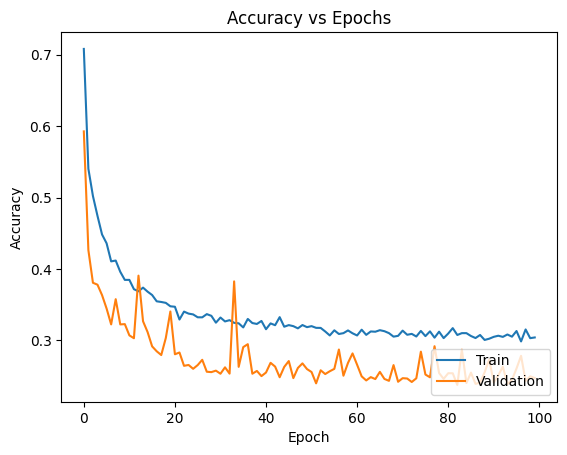

In [51]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [53]:
df = pd.read_csv("CensusCanada2021Test.csv")

In [54]:
df

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,7333,4195,4195,125,1230,435,415,865,325,210,585,5,4195,0,4195,765,3430
1,6624,3510,3510,15,30,70,510,990,1010,820,65,105,3330,75,3510,2140,1365
2,7446,2985,2985,25,0,15,135,455,555,730,1070,1380,1590,15,2985,1630,1355
3,1049,655,655,435,185,20,0,0,0,0,10,75,560,20,655,90,565
4,4630,1610,1610,705,690,95,65,15,0,0,40,485,1125,0,1610,645,970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,879,370,370,105,80,25,45,10,15,15,80,270,80,20,370,330,35
851,3743,1885,1885,1290,360,110,60,25,10,0,25,1045,850,0,1885,935,945
852,3083,1010,1010,10,90,760,140,0,0,0,0,1020,0,0,1010,945,70
853,3898,1680,1680,405,915,120,30,15,15,110,70,1355,290,35,1680,1465,220


In [55]:
df.isna().sum()

Total Population                                                             0
Total Households                                                             0
Total Households For Period Of Construction                                  0
Total Households For Period Of Construction Built Before 1961                0
Total Households For Period Of Construction Built Between 1961 And 1980      0
Total Households For Period Of Construction Built Between 1981 And 190       0
Total Households For Period Of Construction Built Between 1991 And 2000      0
Total Households For Period Of Construction Built Between 2001 And 2005      0
Total Households For Period Of Construction Built Between 2006 And 2010      0
Total Households For Period Of Construction Built Between 2011 And 2015      0
Total Households For Period Of Construction Built Between 2016 And 2021      0
Total Households For Structure Type Houses                                   0
Total Households For Structure Type Apartment, Build

In [56]:
columns = [
           'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Period Of Construction Built Between 2006 And 2010',
       'Total Households For Period Of Construction Built Between 2011 And 2015',
       'Total Households For Period Of Construction Built Between 2016 And 2021',
       'Total Households For Structure Type Other Dwelling Types',
        'Total Households for Tenure']

df_test = df.drop(columns = columns)

In [57]:
df_test

,Total Population,Total Households,Total Households For Period Of Construction,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,7333,4195,4195,5,4195,765,3430
1,6624,3510,3510,105,3330,2140,1365
2,7446,2985,2985,1380,1590,1630,1355
3,1049,655,655,75,560,90,565
4,4630,1610,1610,485,1125,645,970
...,...,...,...,...,...,...,...
850,879,370,370,270,80,330,35
851,3743,1885,1885,1045,850,935,945
852,3083,1010,1010,1020,0,945,70
853,3898,1680,1680,1355,290,1465,220


In [59]:
scaler = StandardScaler()
df_scaled_Test = scaler.fit_transform(df_test)
df_test_scaled = pd.DataFrame(df_scaled_Test)
df_test_scaled

,0,1,2,3,4,5,6
0,1.390798,2.823857,2.823857,-1.513198,4.157072,-0.621662,4.641561
1,1.039650,2.012999,2.012999,-1.369657,3.116039,1.585252,1.185998
2,1.446763,1.391539,1.391539,0.460489,1.021939,0.766688,1.169264
3,-1.721491,-1.366563,-1.366563,-1.412719,-0.217673,-1.705057,-0.152719
4,0.052078,-0.236096,-0.236096,-0.824202,0.462308,-0.814266,0.525006
...,...,...,...,...,...,...,...
850,-1.805687,-1.703927,-1.703927,-1.132815,-0.795356,-1.319850,-1.039619
851,-0.387228,0.089431,0.089431,-0.020373,0.131344,-0.348807,0.483171
852,-0.714108,-0.946337,-0.946337,-0.056258,-0.891636,-0.332757,-0.981051
853,-0.310461,-0.153235,-0.153235,0.424604,-0.542619,0.501858,-0.730041


In [60]:
df_test_scaled

,0,1,2,3,4,5,6
0,1.390798,2.823857,2.823857,-1.513198,4.157072,-0.621662,4.641561
1,1.039650,2.012999,2.012999,-1.369657,3.116039,1.585252,1.185998
2,1.446763,1.391539,1.391539,0.460489,1.021939,0.766688,1.169264
3,-1.721491,-1.366563,-1.366563,-1.412719,-0.217673,-1.705057,-0.152719
4,0.052078,-0.236096,-0.236096,-0.824202,0.462308,-0.814266,0.525006
...,...,...,...,...,...,...,...
850,-1.805687,-1.703927,-1.703927,-1.132815,-0.795356,-1.319850,-1.039619
851,-0.387228,0.089431,0.089431,-0.020373,0.131344,-0.348807,0.483171
852,-0.714108,-0.946337,-0.946337,-0.056258,-0.891636,-0.332757,-0.981051
853,-0.310461,-0.153235,-0.153235,0.424604,-0.542619,0.501858,-0.730041


In [61]:
df_test_scaled.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [76]:
predictions = model.predict(df_test_scaled)


27/27 [==============================] - 0s 2ms/step


In [77]:
predictions

array([[-1.40108311e+00],
       [-6.38860345e-01],
       [-1.62468195e-01],
       [-1.49409115e+00],
       [-5.87577283e-01],
       [ 6.00269735e-01],
       [ 7.30314970e-01],
       [ 4.04428005e-01],
       [-7.69546390e-01],
       [ 3.91298652e-01],
       [-4.51577336e-01],
       [ 2.34525681e-01],
       [ 3.48669767e-01],
       [ 5.58876634e-01],
       [-5.13960063e-01],
       [-4.80866343e-01],
       [ 1.04235041e+00],
       [-1.41356683e+00],
       [-1.50220782e-01],
       [-4.75967973e-01],
       [-1.54343498e+00],
       [ 6.12040341e-01],
       [-4.86202091e-01],
       [-7.91759610e-01],
       [-6.78592443e-01],
       [-5.02788126e-01],
       [-9.87052798e-01],
       [-1.46779704e+00],
       [ 3.82995099e-01],
       [ 5.64139247e-01],
       [ 3.93925965e-01],
       [ 1.49586546e+00],
       [ 8.90576363e-01],
       [ 3.77053201e-01],
       [-4.58320946e-01],
       [ 3.71966898e-01],
       [-1.48047304e+00],
       [-8.49728525e-01],
       [-9.5

In [67]:
predictions_df = pd.DataFrame(predictions)

In [68]:
predictions_df

,0
0,-1.401083
1,-0.638860
2,-0.162468
3,-1.494091
4,-0.587577
...,...
850,-0.465796
851,-0.856871
852,1.040649
853,-0.102760


In [79]:
# Since the neural net inputs are scaled, the output is also scaled. Doing a direct scaler.inverse_transform outputs negative values, so this is a dummy file with random
# income values to ensure that the output of the neural net can be scaled correctly to match median income

import pandas as pd

empty_df = pd.read_csv('scaler_data.csv')




In [80]:
from sklearn.preprocessing import MinMaxScaler


In [81]:
scaler = StandardScaler()
df_scaled_Test1 = scaler.fit_transform(empty_df)
df_test_scaled1 = pd.DataFrame(df_scaled_Test1)
df_test_scaled1

,0
0,1.232990
1,0.990485
2,-0.626216
3,0.828815
4,0.788397
...,...
849,0.707562
850,0.384222
851,0.020464
852,2.122175


In [82]:
output = scaler.inverse_transform(predictions_df)

In [83]:
output

array([[ 45828.434],
       [ 64687.156],
       [ 76473.93 ],
       [ 43527.25 ],
       [ 65955.99 ],
       [ 95345.4  ],
       [ 98562.945],
       [ 90499.93 ],
       [ 61453.754],
       [ 90175.086],
       [ 69320.87 ],
       [ 86296.25 ],
       [ 89120.375],
       [ 94321.26 ],
       [ 67777.41 ],
       [ 68596.2  ],
       [106283.25 ],
       [ 45519.562],
       [ 76776.95 ],
       [ 68717.4  ],
       [ 42306.4  ],
       [ 95636.625],
       [ 68464.19 ],
       [ 60904.16 ],
       [ 63704.113],
       [ 68053.82 ],
       [ 56072.266],
       [ 44177.812],
       [ 89969.65 ],
       [ 94451.47 ],
       [ 90240.09 ],
       [117504.   ],
       [102528.09 ],
       [ 89822.63 ],
       [ 69154.016],
       [ 89696.79 ],
       [ 43864.188],
       [ 59469.91 ],
       [ 56975.54 ],
       [ 74271.36 ],
       [ 57342.848],
       [ 54006.703],
       [ 83445.63 ],
       [111166.9  ],
       [ 54716.12 ],
       [ 77392.875],
       [ 68865.41 ],
       [ 6889

In [88]:
output.shape

(855, 1)

In [87]:
output_filename = f'Team12predictions.txt'
with open(output_filename, 'w') as f:
    for o in output:
        f.write(f'{o}\n')

